### Ax = b. Residual vector. Orthogonality.

TODO: 
when column space of A matrix have non 0 components charts are incorrect.  
add 3d space vizualization  

In [27]:
%%html
<style>
/*overwrite hard coded write background by vscode for ipywidges */
.cell-output-ipywidget-background {
   background-color: transparent !important;
}

/*set widget foreground text and color of interactive widget to vs dark theme color */
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}
</style>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.core.display import HTML


plt.style.use('dark_background')



x is:  [3.16227766]  predict is:  [3.16227766 0.        ]


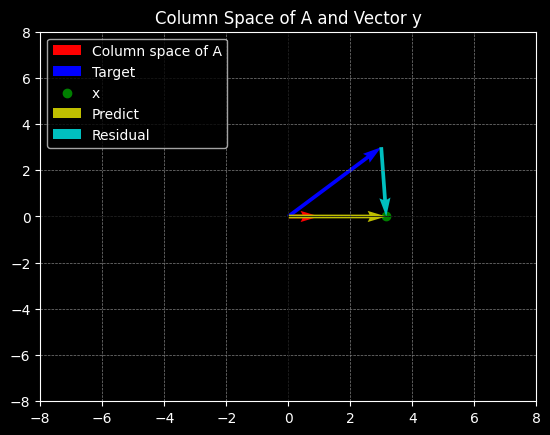

In [95]:


from IPython.display import clear_output

x_slider =  widgets.FloatLogSlider(value=1, min=-5.0, max=5.0, description="x")
a_slider_00 = widgets.FloatSlider(value=1.0, min=-5.0, max=5.0, description='A[0,0]:')
a_slider_10 = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, description='A[1,0]:')
y_slider_0 = widgets.FloatSlider(value=3.0, min=-5.0, max=5.0, description='y[0]:')
y_slider_1 = widgets.FloatSlider(value=3.0, min=-5.0, max=5.0, description='y[1]:')


A = np.array([[a_slider_00.value], [a_slider_10.value]])
    
y = np.array([y_slider_0.value, y_slider_1.value])

def update_plot(stub):
    
    clear_output(wait=True)


    slider_row = widgets.HBox([x_slider, a_slider_00, a_slider_10, y_slider_0, y_slider_1])
    display(slider_row)
    plt.clf() 
    A = np.array([[a_slider_00.value], [a_slider_10.value]])
    
    y = np.array([y_slider_0.value, y_slider_1.value])

    x = np.array([x_slider.value])
    plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Column space of A')
    plt.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', label='Target')


    plt.scatter(x[0], A[1], color="g", label="x")
    predict =  A @ x
    print('x is: ', x, ' predict is: ', predict)
    plt.quiver(0, 0, predict[0], predict[1], angles='xy', scale_units='xy', scale=1, color='y', label='Predict')
    
    residual_end_x = -y[0] + x[0]
    residual_end_y = -y[1] # x[1] == 0
    plt.quiver(y[0], y[1], residual_end_x, residual_end_y, angles='xy', scale_units='xy', scale=1, color='c', label='Residual')

    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title('Column Space of A and Vector y')
    plt.legend()
    plt.show()



x_slider.observe(update_plot, names='value')
a_slider_00.observe(update_plot, names='value')
a_slider_10.observe(update_plot, names='value')
y_slider_0.observe(update_plot, names='value')
y_slider_1.observe(update_plot, names='value')

update_plot(None)

x is:  [3.]  predict is:  [3. 0.]


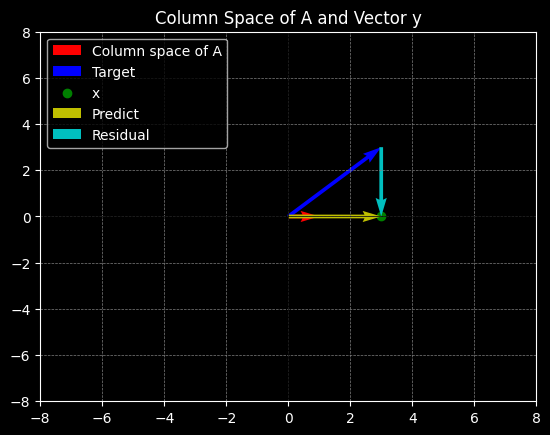

In [96]:
from ipywidgets import Button
from scipy.optimize import minimize

optimize_button = Button(description="Optimize")

def optimize_and_update(_):
    def objective(x):
        return np.linalg.norm(A @ x - y)**2

    initial_guess = x_slider.value

    result = minimize(objective, initial_guess, method='Nelder-Mead')

    x_slider.value = result.x[0]
    update_plot(None)

optimize_button.on_click(optimize_and_update)

button_row = widgets.HBox([optimize_button])
display(button_row)

update_plot(None)
